In [1]:
import redshift_connector
import pandas as pd
from datetime import datetime
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# 환경 변수 로드
load_dotenv()

# redshift 환경변수
redshift_host = os.getenv('redshift_host')
redshift_user = os.getenv('redshift_user')
redshift_password = os.getenv("redshift_password")

# Redshift 연결
conn = redshift_connector.connect(
    host=redshift_host,
    port=5439,
    database='dev',
    user=redshift_user,
    password=redshift_password
)

# SQL 쿼리 실행
query = """
SELECT pubdate, sentiment 
FROM news_data 
ORDER BY pubdate ASC;
"""

# Pandas를 이용해 쿼리 결과를 DataFrame으로 저장
df = pd.read_sql(query, conn)

# pubDate를 datetime 형식으로 변환
df['pubdate'] = pd.to_datetime(df['pubdate'])

# Redshift 연결 종료
conn.close()

/var/folders/p4/jwxhs2ys29n76g77s8hxxxmr0000gn/T/ipykernel_27471/690454369.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


### 간단한 날짜 별 감정 평균값

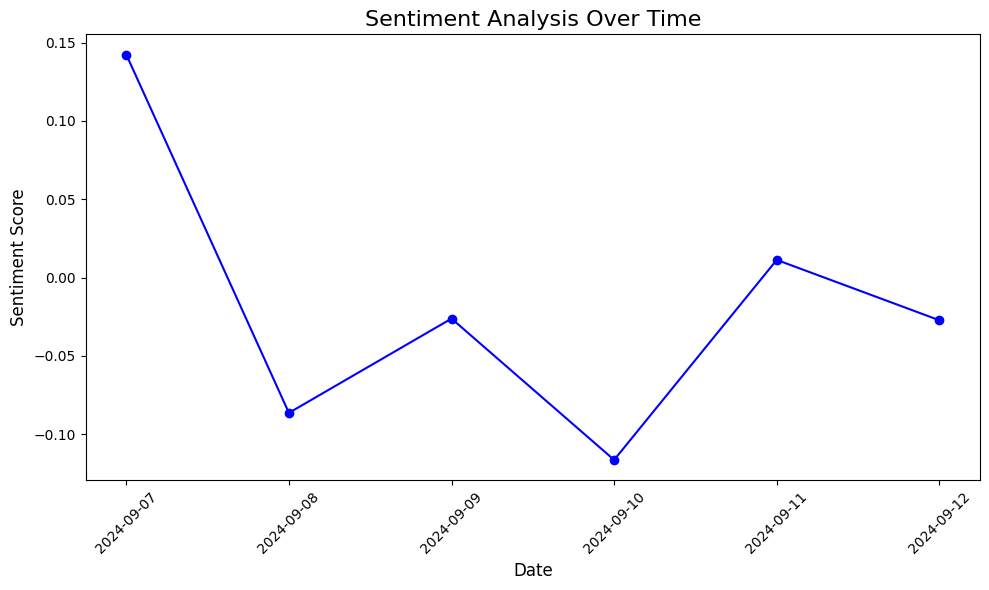

In [3]:
import matplotlib.pyplot as plt

# 날짜별 sentiment 값의 평균 계산 (pubdate를 인덱스로 사용)
df_grouped = df.groupby(df['pubdate'].dt.date)['sentiment'].mean().reset_index()

# 차트 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['pubdate'], df_grouped['sentiment'], marker='o', linestyle='-', color='b')

# 차트 제목 및 레이블 설정
plt.title('Sentiment Analysis Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xticks(rotation=45)

# 차트 표시
plt.tight_layout()
plt.show()
